In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

#한글 폰트 설정
plt.rcParams['font.family'] = 'HYGothic-Extra'

data = pd.read_csv('company_nps_data.csv', encoding='cp949')

cor_id = [294337,294367,294387,403359,403434,403462,419945,420046,469458,469677] #선정된 id들 : 10개

df = data.loc[data['회사ID'].isin(cor_id)]
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
757,420046,607302624,2018,4,126999240,425
1431,403359,156550808,2018,12,373921480,1196
1439,294337,287134819,2018,5,410699340,2021
2760,294367,633160910,2017,8,269094200,932
2823,294337,146274359,2016,11,306936920,1540
...,...,...,...,...,...,...
99353,420046,488179570,2017,5,112913540,397
99415,403359,140810131,2016,6,287342220,1019
99494,403462,157122353,2018,3,152198000,399
99724,294387,150451803,2017,9,161888520,768


In [32]:
df.sort_values(by=['회사ID','년도','월'], inplace=True)

In [33]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
#df.drop('level_0',axis=1, inplace=True)
df

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,294337,102579741,2015,11,244699780,1202
1,294337,102579741,2015,12,265217820,1318
2,294337,146274359,2016,1,266212980,1305
3,294337,146274359,2016,2,274833900,1350
4,294337,146274359,2016,3,276378820,1350
...,...,...,...,...,...,...
370,469677,108023614,2018,8,126135120,545
371,469677,108023614,2018,9,124187640,536
372,469677,108023614,2018,10,127180360,547
373,469677,108023614,2018,11,127590260,555


# 성장률

### 매출 증가율 col 생성 및 추가

In [54]:
# 매출액 증가율 함수
# (공식) 매출액증가율(%) = (당기매출액-전기매출액)/전기매출 *100

def sales_up_rate(company_id):
    temp = df.loc[df['회사ID'] == company_id, :]
    
    # '회사ID', '년도', '월' 기준으로 오름차순 정렬한 데이터프레임 생성 
    sorted_df = temp.sort_values(by=['회사ID', '년도', '월'], axis=0)
    sorted_df.reset_index(drop=True, inplace=True)
    
    # 회사 id별로 매출액 증가율 계산 
    sales_rate = sorted_df.drop_duplicates(['연매출액'], keep = 'first')
    sales_rate['매출액증가율'] = 0
    
    for i in range(1, len(sales_rate)):
        sales_rate['매출액증가율'].iloc[i] = round((sales_rate['연매출액'].iloc[i]-sales_rate['연매출액'].iloc[i-1])
        /sales_rate['연매출액'].iloc[i-1]*100, 4)
   
    # 필요없는 컬럼 정리
    sales_rate.drop(['월', '월별_연금보험료', '월별_직원수'], axis=1, inplace=True)
    
    #최종 데이터 프레임 리턴
    return sales_rate  # 데이터 프레임 리턴

In [98]:
# d = "corp_"
# corp = []

# for i in range(len(cor_id)):
#     a =  str(d) + str(cor_id[i])
#     corp.append(a)
# print(corp) # 'corp_294337'
#     #corp[i] = sales_up_rate(cor_id[i])

In [99]:
d294337 = sales_up_rate(cor_id[0])
d294337

,회사ID,연매출액,년도,매출액증가율
0,294337,102579741,2015,0.0000
2,294337,146274359,2016,42.5958
14,294337,192586665,2017,31.6613
26,294337,287134819,2018,49.0938


In [100]:
d294367 = sales_up_rate(cor_id[1])
d294367

,회사ID,연매출액,년도,매출액증가율
0,294367,601303965,2015,0.0000
2,294367,535249090,2016,-10.9853
14,294367,633160910,2017,18.2928
26,294367,875661976,2019,38.3001


In [101]:
d294387 = sales_up_rate(cor_id[2])
d294387

,회사ID,연매출액,년도,매출액증가율
0,294387,132543154,2015,0.0000
2,294387,153057557,2016,15.4775
14,294387,150451803,2017,-1.7025
26,294387,168291675,2018,11.8575


In [102]:
d403359 = sales_up_rate(cor_id[3])
d403359

,회사ID,연매출액,년도,매출액증가율
0,403359,132314221,2015,0.0000
2,403359,140810131,2016,6.4210
14,403359,147618546,2017,4.8352
26,403359,156550808,2018,6.0509


In [103]:
d403434 = sales_up_rate(cor_id[4])
d403434

,회사ID,연매출액,년도,매출액증가율
0,403434,139353875,2015,0.0000
2,403434,147323098,2016,5.7187
14,403434,150446694,2017,2.1202
26,403434,169810428,2018,12.8708


In [104]:
d403462 = sales_up_rate(cor_id[5])
d403462

,회사ID,연매출액,년도,매출액증가율
0,403462,125610912,2015,0.0000
2,403462,133208061,2016,6.0482
14,403462,156731364,2017,17.6591
26,403462,157122353,2018,0.2495


In [105]:
d419945 = sales_up_rate(cor_id[6])
d419945

,회사ID,연매출액,년도,매출액증가율
0,419945,7108279325,2016,0.0000
12,419945,7853891952,2017,10.4894
24,419945,8391469199,2018,6.8447
36,419945,10058868796,2019,19.8702


In [106]:
d420046 = sales_up_rate(cor_id[7])
d420046

,회사ID,연매출액,년도,매출액증가율
0,420046,396063681,2016,0.0000
12,420046,488179570,2017,23.2578
24,420046,607302624,2018,24.4015


In [107]:
d469458 = sales_up_rate(cor_id[8])
d469458

,회사ID,연매출액,년도,매출액증가율
0,469458,97075344,2015,0.0000
1,469458,112817883,2016,16.2168
13,469458,113442446,2017,0.5536


In [108]:
d469677 = sales_up_rate(cor_id[9])
d469677

,회사ID,연매출액,년도,매출액증가율
0,469677,48624183,2015,0.0000
2,469677,60309282,2016,24.0315
14,469677,83821545,2017,38.9861
26,469677,108023614,2018,28.8733


In [110]:
growth = pd.concat([d294337, d294367, d294387, d403359, d403434, d403462, d419945, d420046, d469458, d469677])
growth.reset_index(inplace=True)
growth.drop('index',axis=1,inplace=True)
growth

,회사ID,연매출액,년도,매출액증가율
0,294337,102579741,2015,0.0000
1,294337,146274359,2016,42.5958
2,294337,192586665,2017,31.6613
3,294337,287134819,2018,49.0938
4,294367,601303965,2015,0.0000
5,294367,535249090,2016,-10.9853
6,294367,633160910,2017,18.2928
7,294367,875661976,2019,38.3001
8,294387,132543154,2015,0.0000
9,294387,153057557,2016,15.4775


# 데이터 조인 

In [114]:
# left join

df_merge = pd.merge(df, growth, how = 'left', on = ('회사ID','연매출액','년도'))
df_merge

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,매출액증가율
0,294337,102579741,2015,11,244699780,1202,0.0000
1,294337,102579741,2015,12,265217820,1318,0.0000
2,294337,146274359,2016,1,266212980,1305,42.5958
3,294337,146274359,2016,2,274833900,1350,42.5958
4,294337,146274359,2016,3,276378820,1350,42.5958
...,...,...,...,...,...,...,...
370,469677,108023614,2018,8,126135120,545,28.8733
371,469677,108023614,2018,9,124187640,536,28.8733
372,469677,108023614,2018,10,127180360,547,28.8733
373,469677,108023614,2018,11,127590260,555,28.8733


In [184]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   회사ID      375 non-null    int64  
 1   연매출액      375 non-null    int64  
 2   년도        375 non-null    object 
 3   월         375 non-null    object 
 4   월별_연금보험료  375 non-null    int64  
 5   월별_직원수    375 non-null    int64  
 6   매출액증가율    375 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 23.4+ KB


In [185]:
df_merge['년도'] = df_merge['년도'].astype(str)
df_merge['월'] = df_merge['월'].astype(str)

In [186]:
df_merge.isnull().sum()

회사ID        0
연매출액        0
년도          0
월           0
월별_연금보험료    0
월별_직원수      0
매출액증가율      0
dtype: int64

In [187]:
#df_merge.describe()

,회사ID,연매출액,월별_연금보험료,월별_직원수,매출액증가율
count,375.000000,3.750000e+02,3.750000e+02,375.000000,375.000000
mean,385094.240000,1.283385e+09,2.986138e+08,1160.114667,14.402864
std,63935.148762,2.746512e+09,2.402411e+08,884.634104,14.535293
min,294337.000000,4.862418e+07,7.720708e+07,332.000000,-10.985300
25%,294387.000000,1.408101e+08,1.228392e+08,431.500000,2.120200
50%,403434.000000,1.567314e+08,1.794678e+08,832.000000,11.857500
75%,420046.000000,5.352491e+08,3.670116e+08,1709.500000,24.031500
max,469677.000000,1.005887e+10,9.531214e+08,3133.000000,49.093800


### 조건
- 기업별 보유 데이터가 최소 24개월(2년) 이상일것
- 상시 근로자수(직원수) 최소 10명 이상 기업일것

In [188]:
df_merge.groupby('회사ID').count() # 전부 '최소 2년 이상(24개월)' 조건 충족

,연매출액,년도,월,월별_연금보험료,월별_직원수,매출액증가율
회사ID,,,,,,
294337,38,38,38,38,38,38
294367,38,38,38,38,38,38
294387,38,38,38,38,38,38
403359,38,38,38,38,38,38
403434,38,38,38,38,38,38
403462,38,38,38,38,38,38
419945,48,48,48,48,48,48
420046,36,36,36,36,36,36
469458,25,25,25,25,25,25


### 직원 수 10명 이상 충족하는지?

In [189]:
emp_over10 = df_merge.loc[df_merge.월별_직원수 >= 10]
emp_over10 # 종업원이 10명 이상인 데이터프레임 생성

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,매출액증가율
0,294337,102579741,2015,11,244699780,1202,0.0000
1,294337,102579741,2015,12,265217820,1318,0.0000
2,294337,146274359,2016,1,266212980,1305,42.5958
3,294337,146274359,2016,2,274833900,1350,42.5958
4,294337,146274359,2016,3,276378820,1350,42.5958
...,...,...,...,...,...,...,...
370,469677,108023614,2018,8,126135120,545,28.8733
371,469677,108023614,2018,9,124187640,536,28.8733
372,469677,108023614,2018,10,127180360,547,28.8733
373,469677,108023614,2018,11,127590260,555,28.8733


In [190]:
# 연도+월 col 생성 및 추가
연도월 = emp_over10['년도'].map(str) + "_" + emp_over10['월'].map(str) #연도와 월 합침
emp_over10.insert(2, '연도월',연도월)
emp_over10

,회사ID,연매출액,연도월,년도,월,월별_연금보험료,월별_직원수,매출액증가율
0,294337,102579741,2015_11,2015,11,244699780,1202,0.0000
1,294337,102579741,2015_12,2015,12,265217820,1318,0.0000
2,294337,146274359,2016_1,2016,1,266212980,1305,42.5958
3,294337,146274359,2016_2,2016,2,274833900,1350,42.5958
4,294337,146274359,2016_3,2016,3,276378820,1350,42.5958
...,...,...,...,...,...,...,...,...
370,469677,108023614,2018_8,2018,8,126135120,545,28.8733
371,469677,108023614,2018_9,2018,9,124187640,536,28.8733
372,469677,108023614,2018_10,2018,10,127180360,547,28.8733
373,469677,108023614,2018_11,2018,11,127590260,555,28.8733


In [191]:
emp_over10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   회사ID      375 non-null    int64  
 1   연매출액      375 non-null    int64  
 2   연도월       375 non-null    object 
 3   년도        375 non-null    object 
 4   월         375 non-null    object 
 5   월별_연금보험료  375 non-null    int64  
 6   월별_직원수    375 non-null    int64  
 7   매출액증가율    375 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 26.4+ KB


In [192]:
def employee_bar(data,x,y):
    plt.rcParams['figure.figsize'] = [15,5]
    
    sns.barplot(data=data, x=x, y=y)
    plt.axhline(y=10, color='r', linewidth=3)    
    plt.xticks(rotation=-45)
    plt.show()

In [193]:
def employee_line(data, x, y):
    plt.rcParams['figure.figsize'] = [15,5]
    
    sns.lineplot(x=x,y=y,data=data)
    plt.axhline(y=10, color='r', linewidth=2)
    plt.xticks(rotation=-45)
    plt.show()

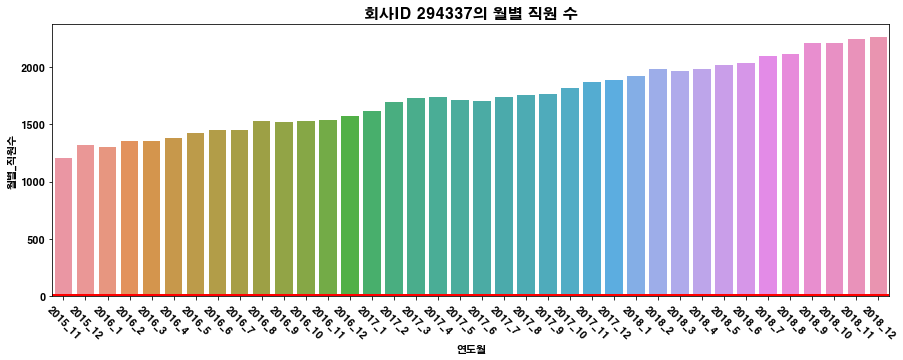

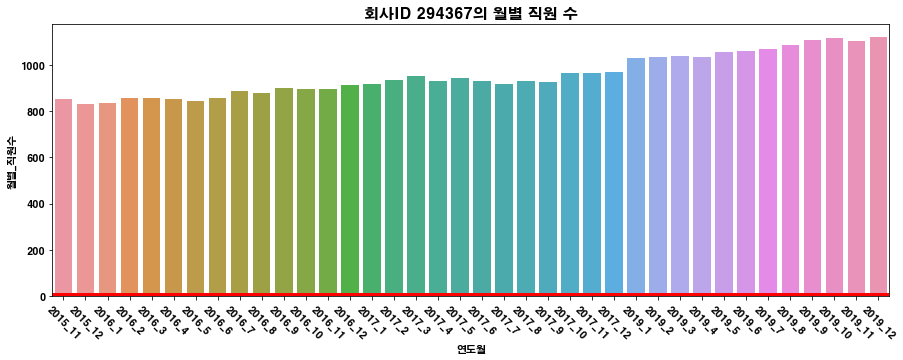

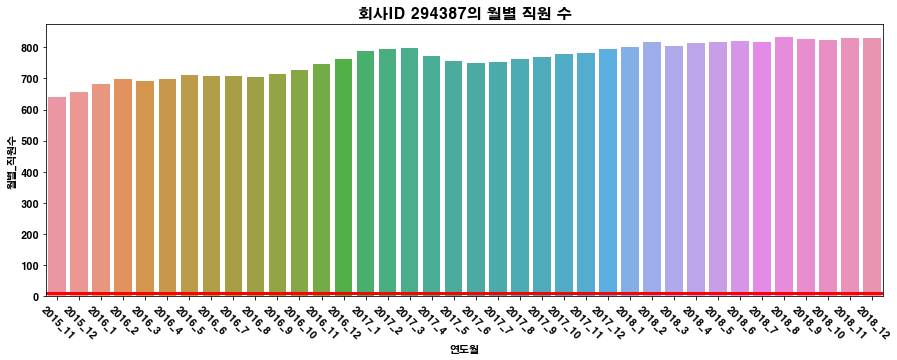

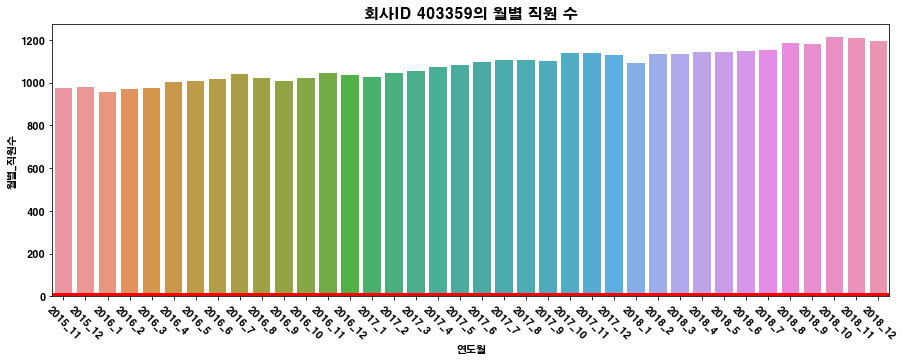

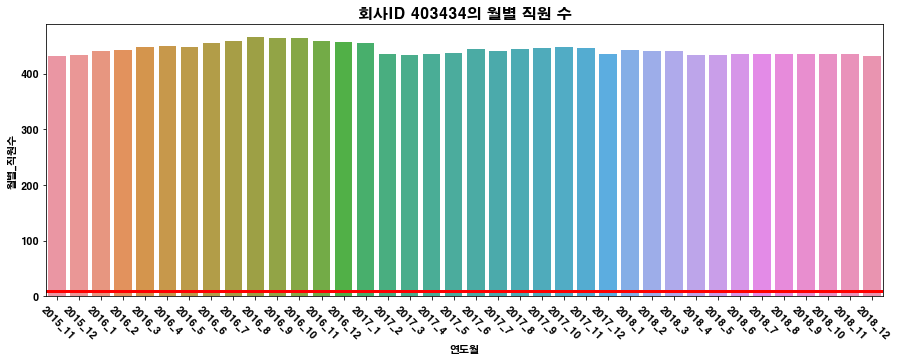

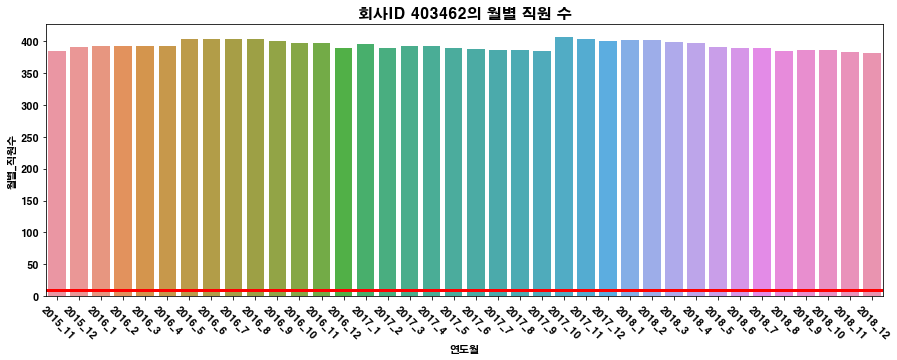

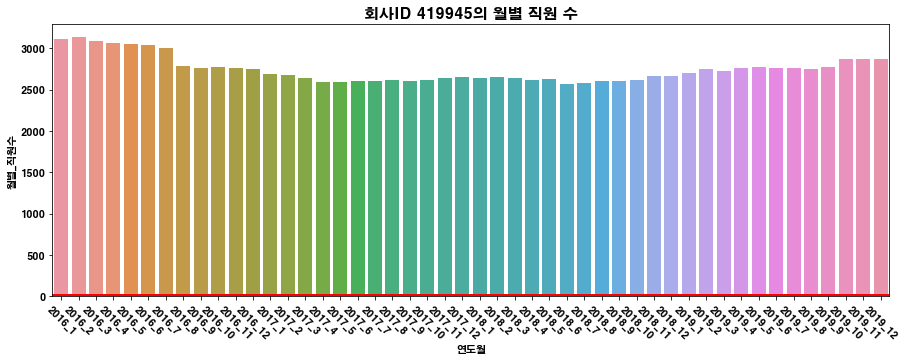

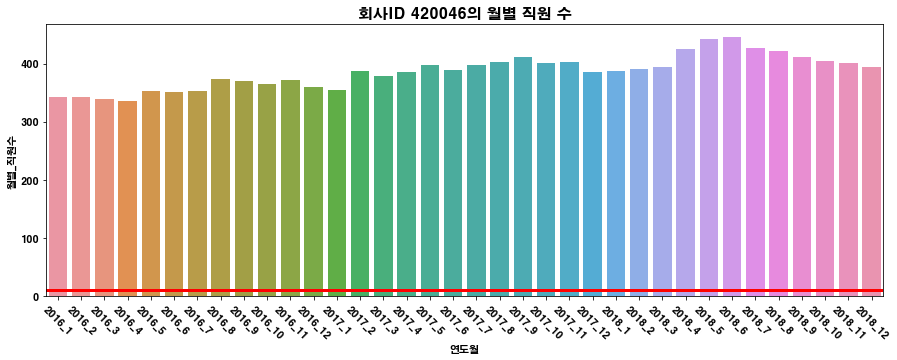

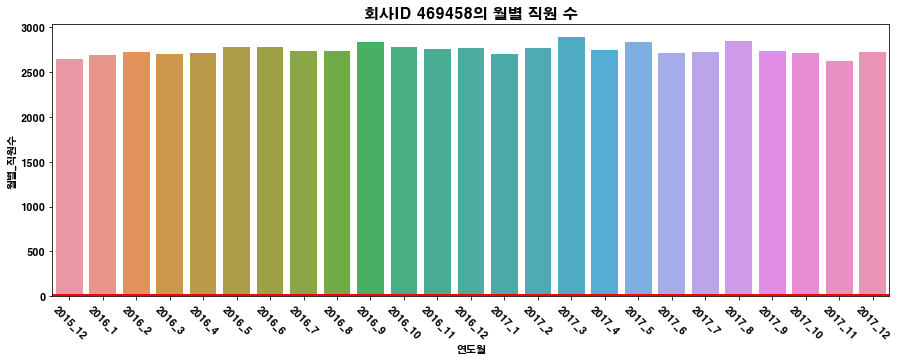

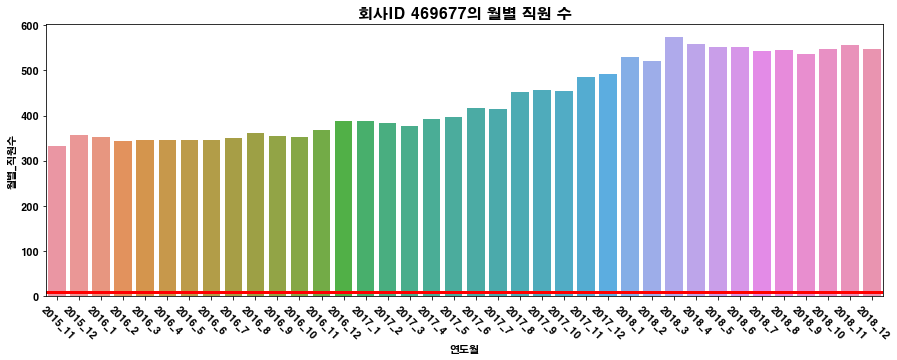

In [194]:
cor_id = emp_over10['회사ID'].unique().tolist() # bar chart

for i in range(len(cor_id)):
    e = emp_over10.loc[emp_over10['회사ID'] == cor_id[i]]
    plt.title("회사ID " + str(cor_id[i]) + "의 월별 직원 수", fontsize=15)
    employee_bar(e, e['연도월'],e['월별_직원수'])

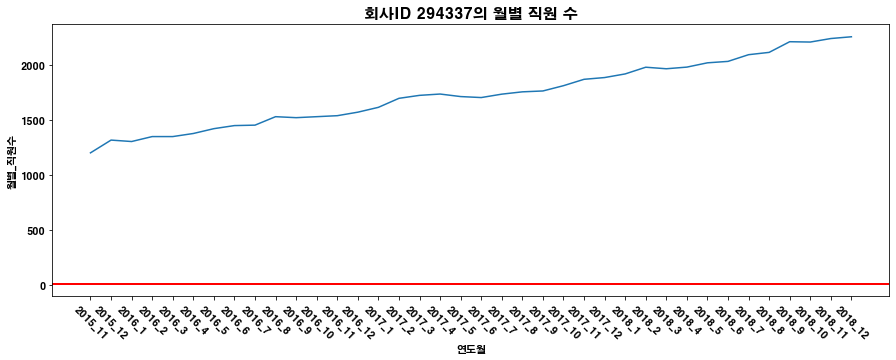

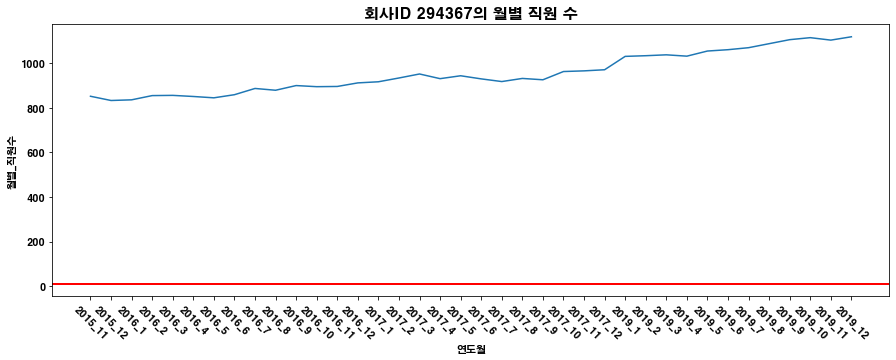

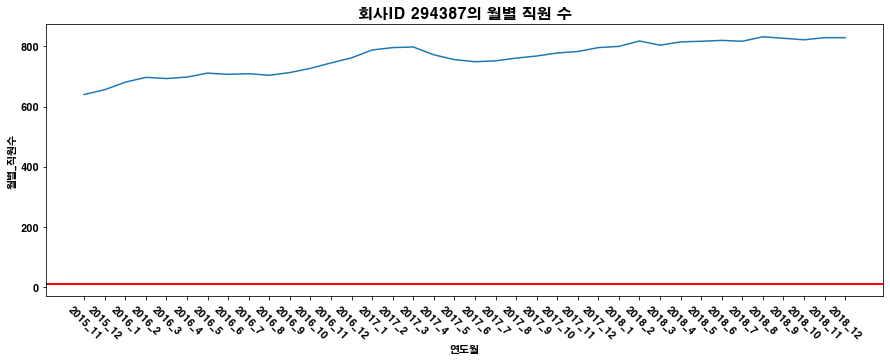

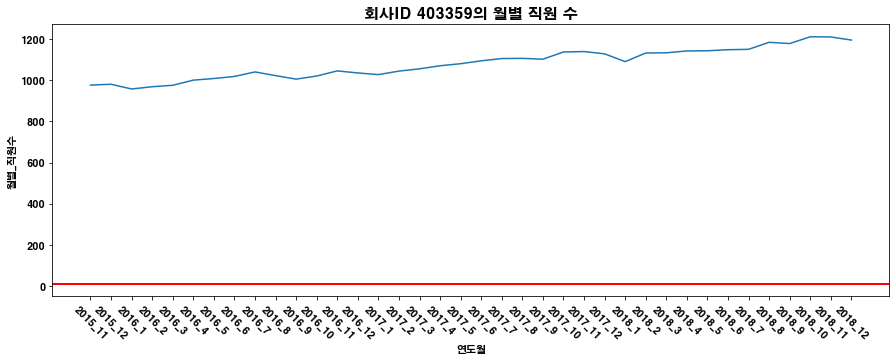

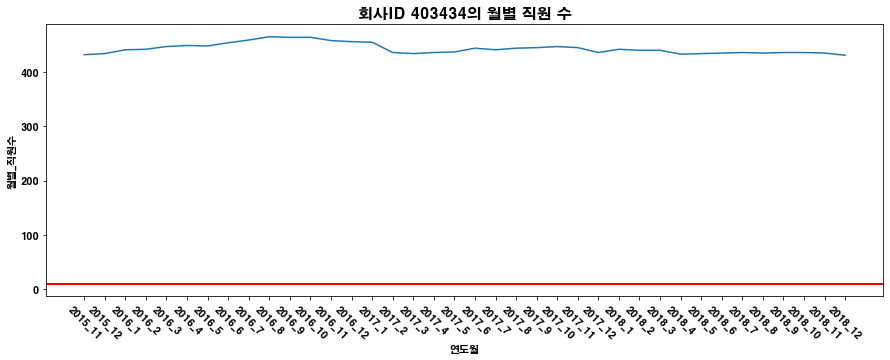

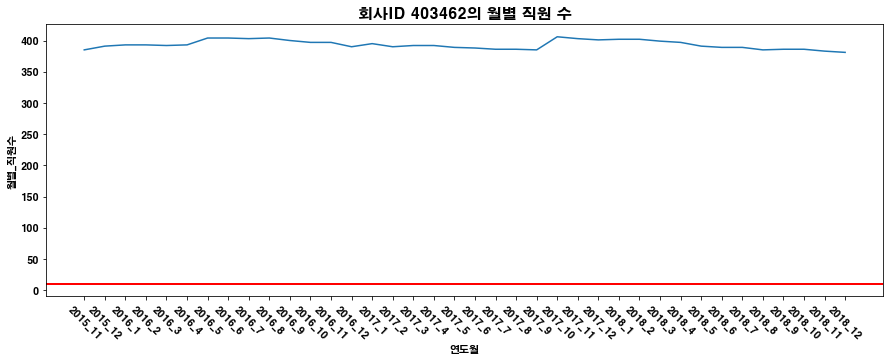

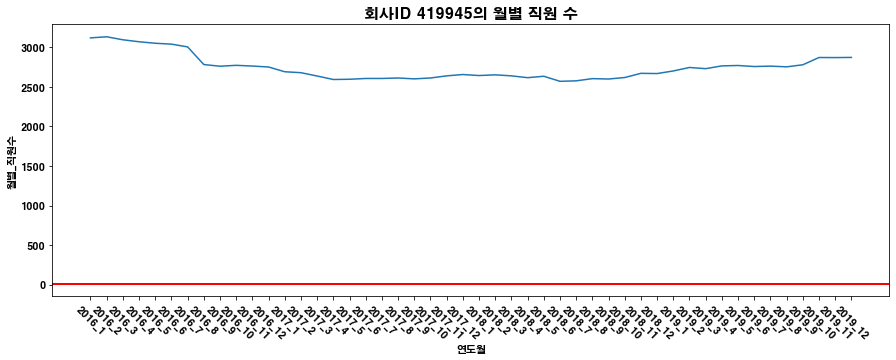

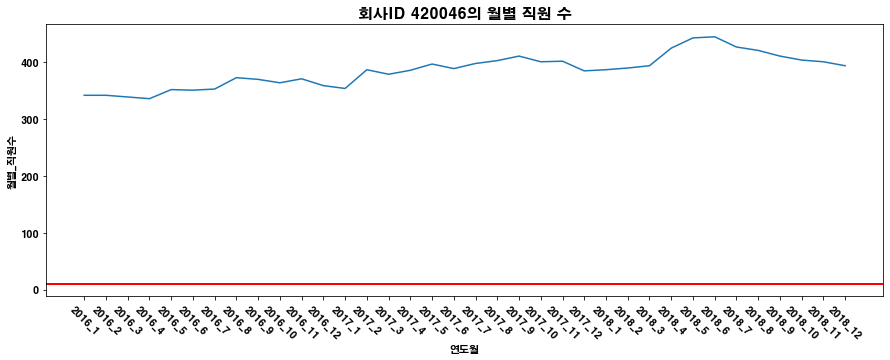

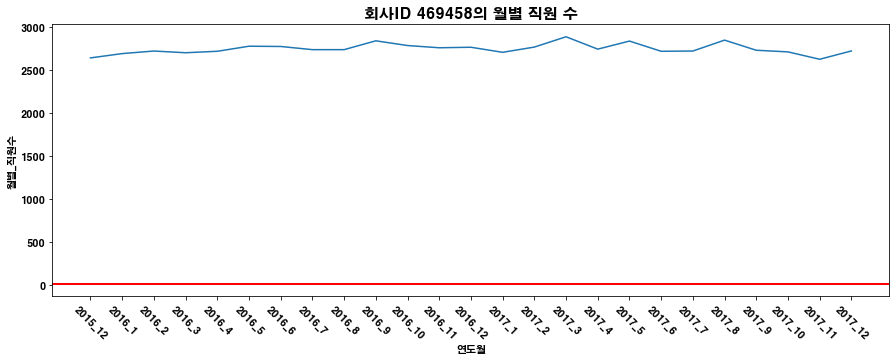

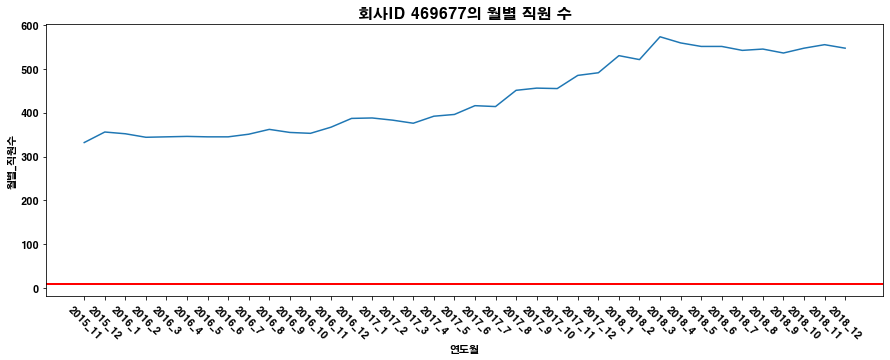

In [195]:
cor_id = emp_over10['회사ID'].unique().tolist() # line chart

for i in range(len(cor_id)):
    e = emp_over10.loc[emp_over10['회사ID'] == cor_id[i]]
    plt.title("회사ID " + str(cor_id[i]) + "의 월별 직원 수", fontsize=15)
    employee_line(e, e['연도월'],e['월별_직원수'])

- 10개의 모든 회사가 직원 수 최소 10명 이상임을 확인

### 매출 증가율 그래프

In [196]:
# def sales(data, x, y):
#     sns.lineplot(x=x, y=y, data=data)
#     #plt.title("매출 증가율 그래프",fontsize=15)
#     plt.legend(loc='best')
#     plt.show()

In [197]:
# def sales_two(data, x, y):
#     fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
#     fig.set_size_inches(18,8)
    
#     sns.barplot(x=x,y=y,data=data, ax=ax1)
#     sns.lineplot(x=x,y=y,data=data, ax=ax2)
    
#     ax1.set(xlabel='연도', ylabel='매출액 증가율')
#     ax2.set(xlabel='연도', ylabel='매출액 증가율')
#     #plt.tight_layout()
#     plt.show()

In [211]:
# cor_id = emp_over10['회사ID'].unique().tolist() # bar chart

# for i in range(len(cor_id)):
#     e = emp_over10.loc[emp_over10['회사ID'] == cor_id[i]]
#     plt.title("회사ID " + str(cor_id[i]) + "의 매출 증가율", fontsize=15)
#     sales(e, e['년도'],e['매출액증가율'])

In [401]:
# def growth():
#     cor_id = emp_over10['회사ID'].unique().tolist()
    
#     for i in range(len(cor_id)):
#         fig, ax1 = plt.subplots()
#         e = emp_over10.loc[emp_over10['회사ID'] == cor_id[i]]
        
#         ax1.bar(e['년도'],e['매출액증가율'], color='lightsteelblue', alpha=0.4, width=0.7)
#         # https://matplotlib.org/3.2.1/gallery/color/named_colors.html : 색상표
#         ax1.set_xlabel('년도')
#         ax1.set_ylabel('매출액 증가율(%)')

#         ax2 = ax1.twinx()
#         ax2.plot(e['년도'], e['매출액증가율'],'-s', color='navy', markersize=7, linewidth=5, alpha=1)
        
#         plt.axhline(y=20, color='r', linewidth=1, ls='--') # 매출 증가율 20%을 기준으로 line 그린 것        
#         plt.title("회사ID " + str(cor_id[i]) + "의 매출 증가율", fontsize=15)
#         plt.show()

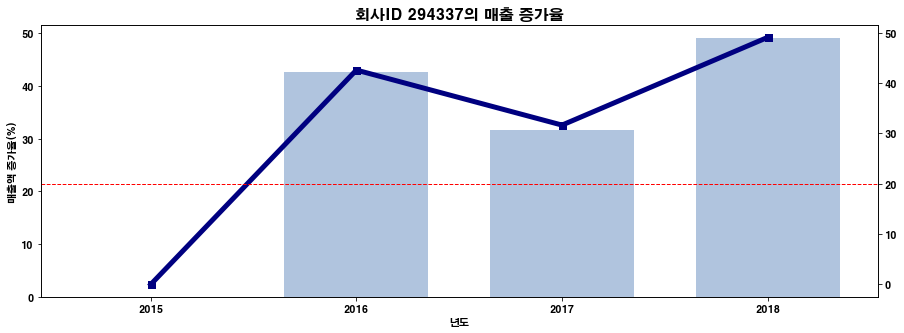

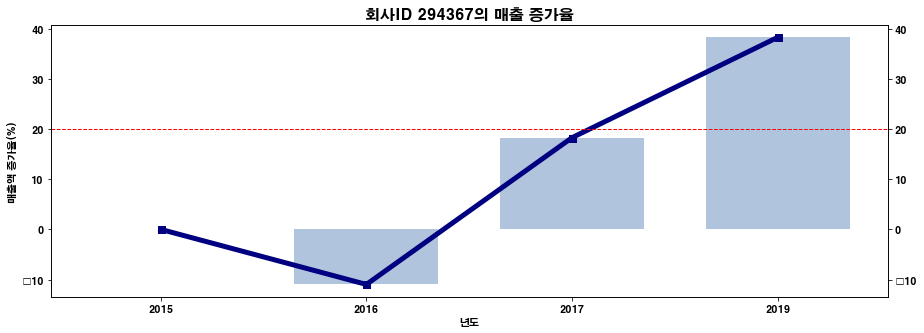

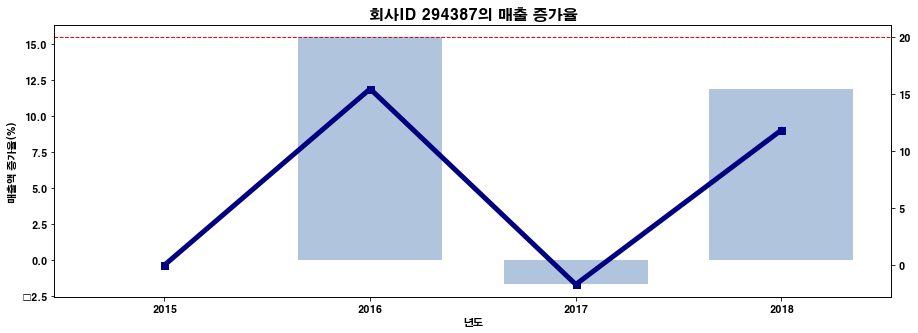

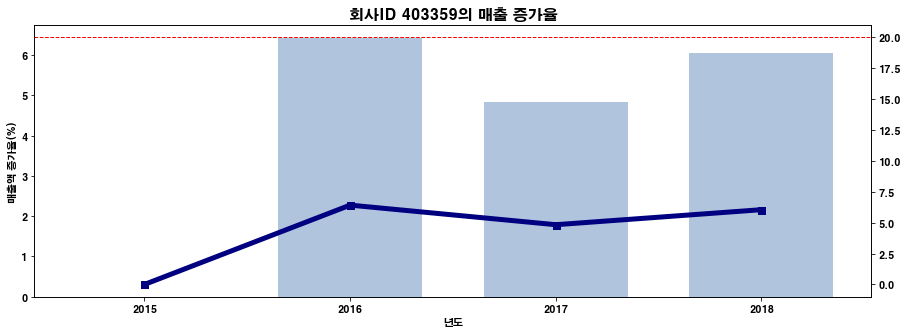

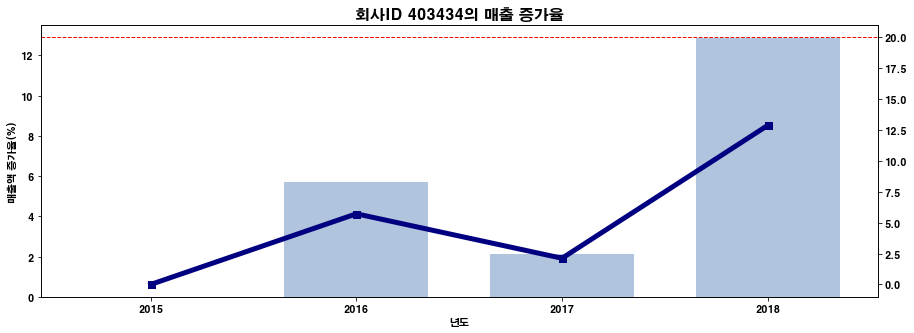

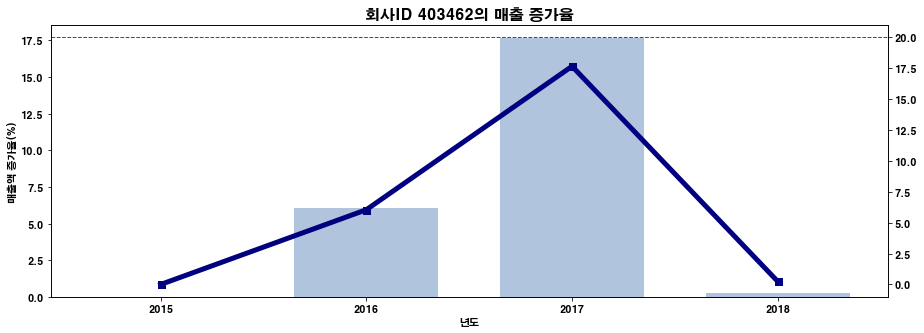

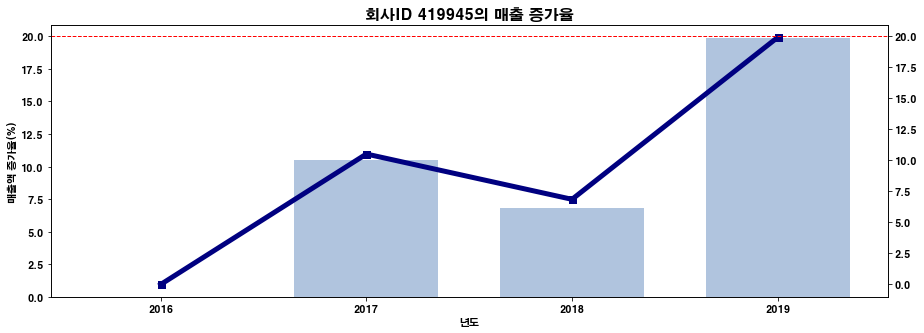

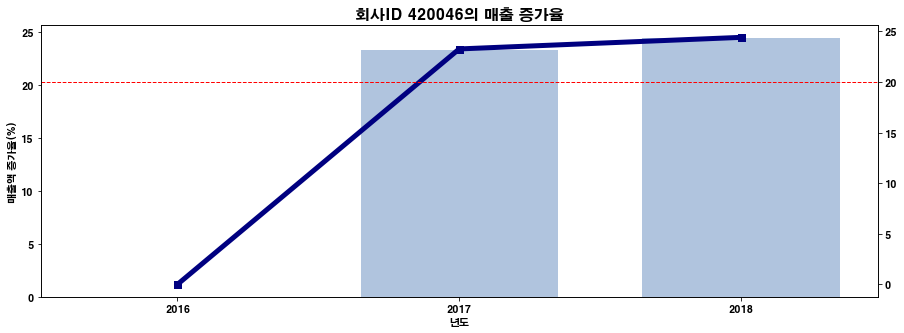

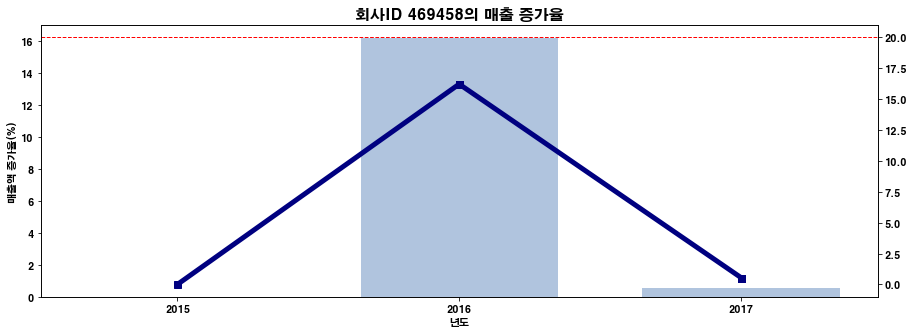

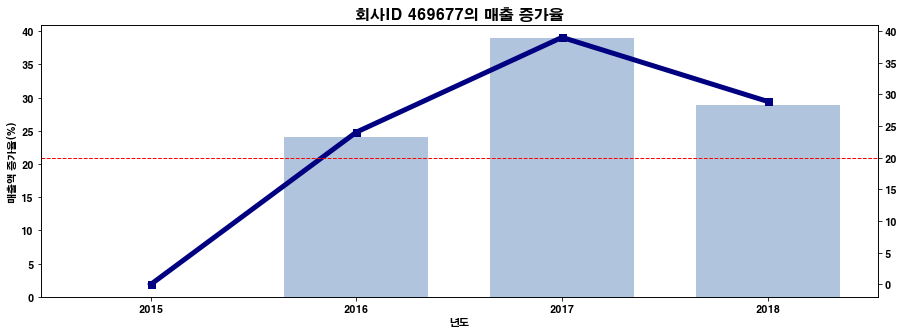

In [404]:
# growth()

In [408]:
def growth():
    cor_id = emp_over10['회사ID'].unique().tolist()
    
    for i in range(len(cor_id)):
        fig, ax1 = plt.subplots()
        e = emp_over10.loc[emp_over10['회사ID'] == cor_id[i]]
        
        ax1.bar(e['년도'],e['연매출액'], color='lightsteelblue', alpha=0.4, width=0.7)
        # https://matplotlib.org/3.2.1/gallery/color/named_colors.html : 색상표
        ax1.set_xlabel('년도')
        ax1.set_ylabel('매출액 증가율(%)')

        ax2 = ax1.twinx()
        ax2.plot(e['년도'], e['매출액증가율'],'-s', color='navy', markersize=7, linewidth=5, alpha=1)
        
        plt.axhline(y=20, color='r', linewidth=1, ls='--') # 매출 증가율 20%을 기준으로 line 그린 것        
        plt.title("회사ID " + str(cor_id[i]) + "의 연매출액(bar)과 매출 증가율(line)", fontsize=15)
        plt.show()

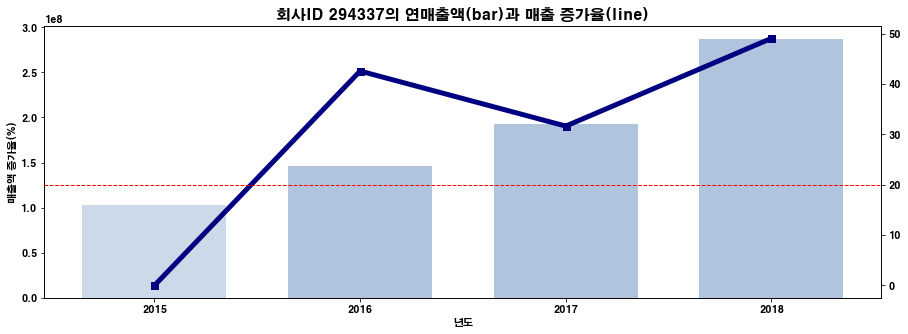

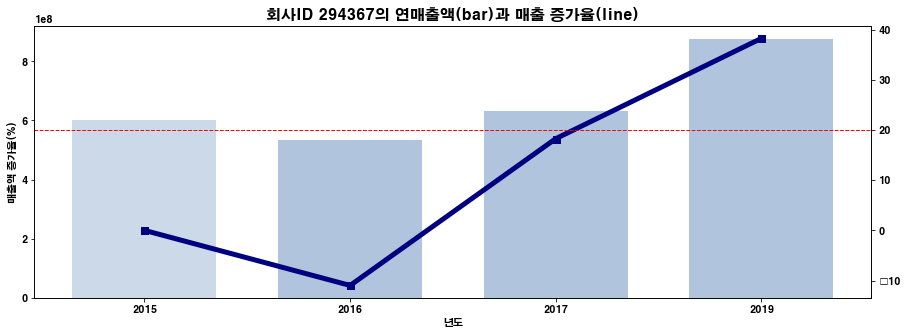

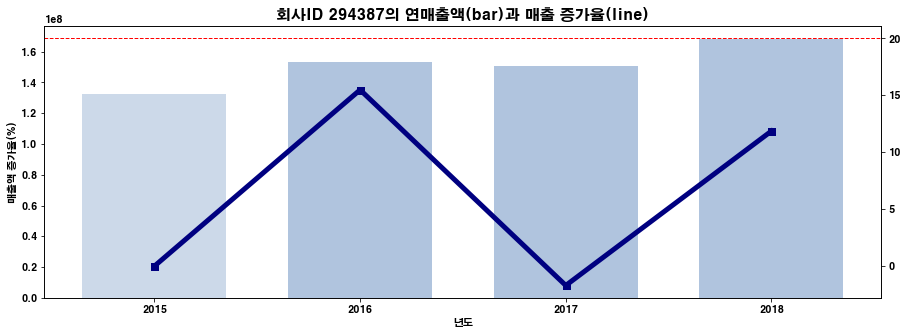

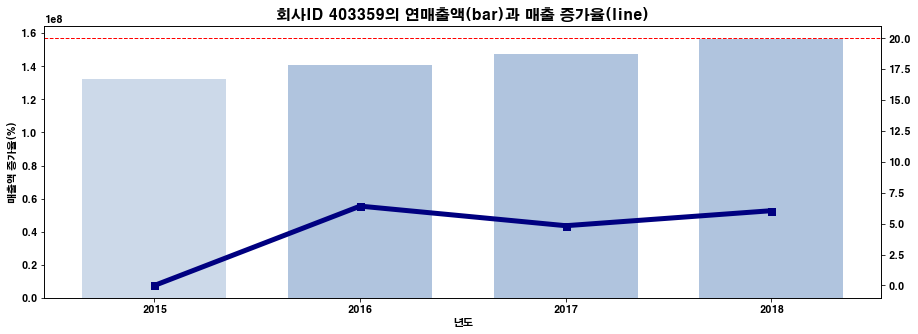

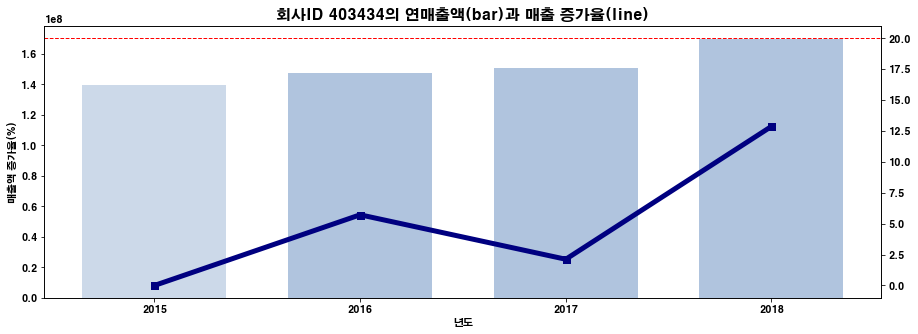

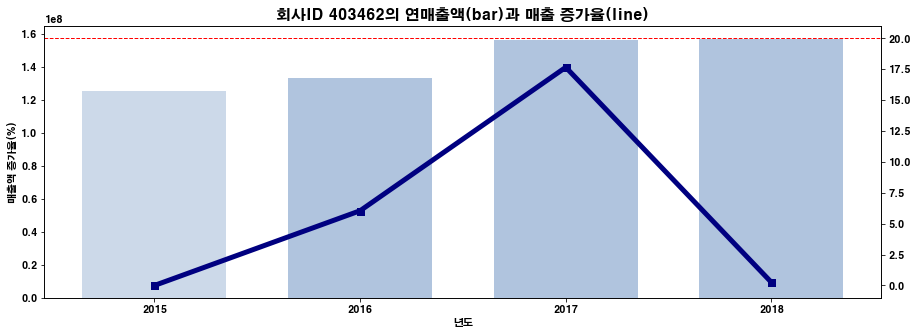

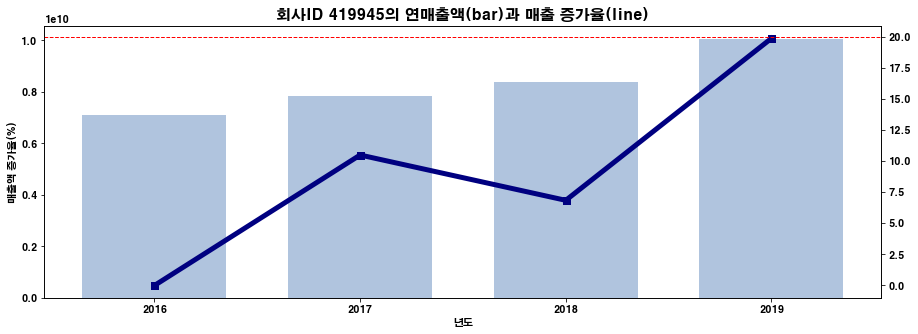

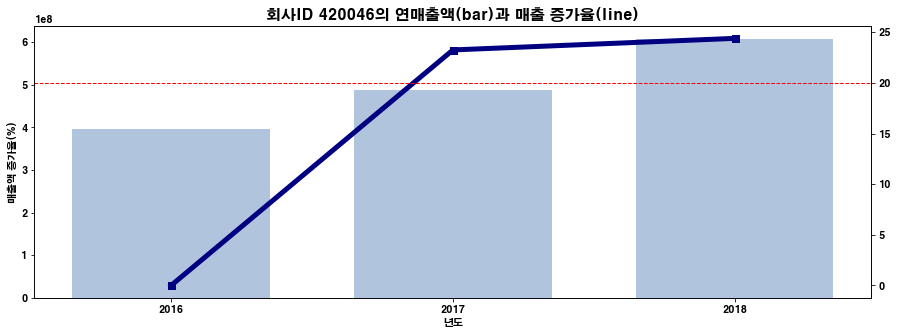

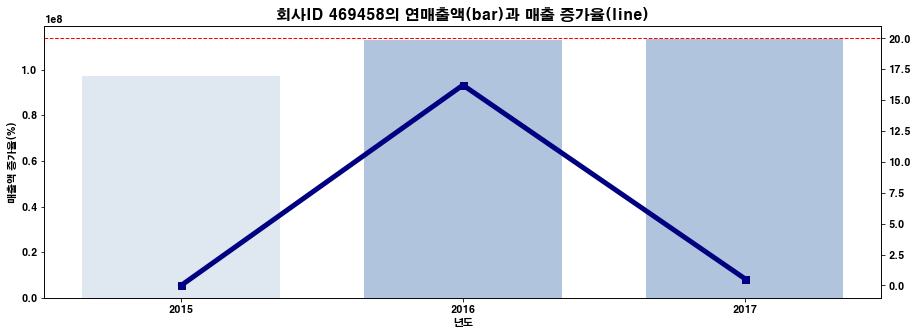

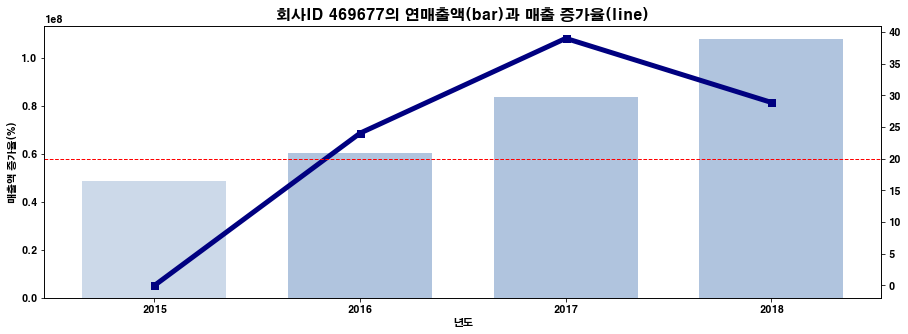

In [409]:
growth()

In [ ]:
# 데이터 값 표시하기, ,
# cor_id = emp_over10['회사ID'].unique().tolist()

# for i in range(2):
#     fig, ax1 = plt.subplots()
#     e = emp_over10.loc[emp_over10['회사ID'] == cor_id[i]]

#     # https://matplotlib.org/3.2.1/gallery/color/named_colors.html : 색상표
#     ax1.bar(e['년도'],e['매출액증가율'], color='lightsteelblue', alpha=0.4, width=0.7)
#     for j, v in enumerate(e['년도']):
#         ax1.text(v, e['매출액증가율'][j], e['매출액증가율'][j],
#                 fontsize=12,
#                 color = 'black',
#                 horizontalalignment = 'center',
#                 verticalalignment = 'bottom')

#     ax1.set_xlabel('년도')
#     ax1.set_ylabel('매출액 증가율(%)')

#     ax2 = ax1.twinx()
#     ax2.plot(e['년도'], e['매출액증가율'],'-s', color='navy', markersize=7, linewidth=5, alpha=1)

#     plt.axhline(y=20, color='r', linewidth=1, ls='--') # 매출 증가율 20%을 기준으로 line 그린 것        
#     plt.title("회사ID " + str(cor_id[i]) + "의 매출 증가율", fontsize=15)
#     plt.show()
    
#     # 두번째 데이터 값이 마이너스라서 안되는 건가..?

# 기업별 데이터 기초 통계량 확인 - 시각화

In [289]:
dt = df_merge.copy()
dt

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,매출액증가율
0,294337,102579741,2015,11,244699780,1202,0.0000
1,294337,102579741,2015,12,265217820,1318,0.0000
2,294337,146274359,2016,1,266212980,1305,42.5958
3,294337,146274359,2016,2,274833900,1350,42.5958
4,294337,146274359,2016,3,276378820,1350,42.5958
...,...,...,...,...,...,...,...
370,469677,108023614,2018,8,126135120,545,28.8733
371,469677,108023614,2018,9,124187640,536,28.8733
372,469677,108023614,2018,10,127180360,547,28.8733
373,469677,108023614,2018,11,127590260,555,28.8733


In [301]:
dt['회사ID'].unique()

array([294337, 294367, 294387, 403359, 403434, 403462, 419945, 420046,
       469458, 469677], dtype=int64)

In [302]:
d294337 = dt.loc[dt['회사ID'] == 294337]
d294367 = dt.loc[dt['회사ID'] == 294367]
d294387 = dt.loc[dt['회사ID'] == 294387]
d403359 = dt.loc[dt['회사ID'] == 403359]
d403434 = dt.loc[dt['회사ID'] == 403434]
d403462 = dt.loc[dt['회사ID'] == 403462]
d419945 = dt.loc[dt['회사ID'] == 419945]
d420046 = dt.loc[dt['회사ID'] == 420046]
d469458 = dt.loc[dt['회사ID'] == 469458]
d469677 = dt.loc[dt['회사ID'] == 469677]

# id : 294337
- 한 회사당 groupby('년도').mean/quantile(.25,.75)/min/max/median 그래프를 아래와 같은 방식으로 그린다고 하면, 한 회사당 12 그래프.
- 총 20개 회사니까 240개..

- barplot/lineplot : sum or mean
- boxplot : median, quantile, min, max

In [332]:
d294337.columns

Index(['회사ID', '연매출액', '년도', '월', '월별_연금보험료', '월별_직원수', '매출액증가율'], dtype='object')

In [388]:
cor1 = d294337.groupby('년도').mean()
cor1.reset_index(inplace=True)
cor1

,년도,회사ID,연매출액,월별_연금보험료,월별_직원수,매출액증가율
0,2015,294337.0,102579741.0,254958800.0,1260.000000,0.0000
1,2016,294337.0,146274359.0,293931090.0,1450.416667,42.5958
2,2017,294337.0,192586665.0,354420340.0,1752.000000,31.6613
3,2018,294337.0,287134819.0,440364375.0,2086.583333,49.0938


In [392]:
cor1['회사ID'] = cor1['회사ID'].astype(str)
cor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   년도        4 non-null      object 
 1   회사ID      4 non-null      object 
 2   연매출액      4 non-null      float64
 3   월별_연금보험료  4 non-null      float64
 4   월별_직원수    4 non-null      float64
 5   매출액증가율    4 non-null      float64
dtypes: float64(4), object(2)
memory usage: 320.0+ bytes


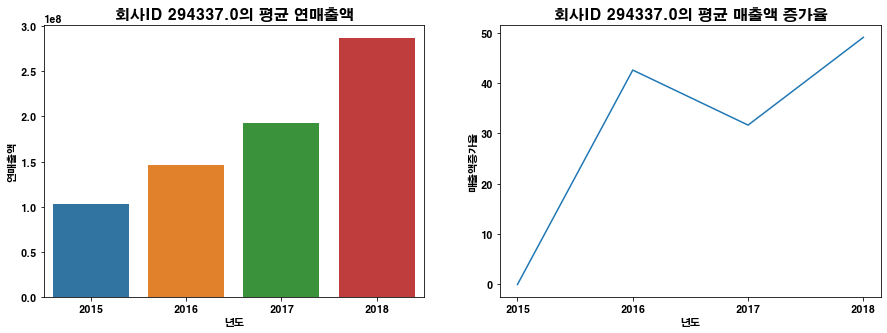

In [399]:
# 연매출액, 매출액 증가율

plt.subplot(121)
sns.barplot(x=cor1['년도'], y=cor1['연매출액'], data=cor1)
plt.title("회사ID " + cor1['회사ID'][0] + "의 평균 연매출액", fontsize=15)

plt.subplot(122)
sns.lineplot(x=cor1['년도'], y=cor1['매출액증가율'], data=cor1)
#ax2.title("회사ID " + str(cor_id[i]) + "의 매출액 증가율", fontsize=15)
plt.title("회사ID " + cor1['회사ID'][0] + "의 평균 매출액 증가율", fontsize=15)

fig.tight_layout()
plt.show()

No handles with labels found to put in legend.


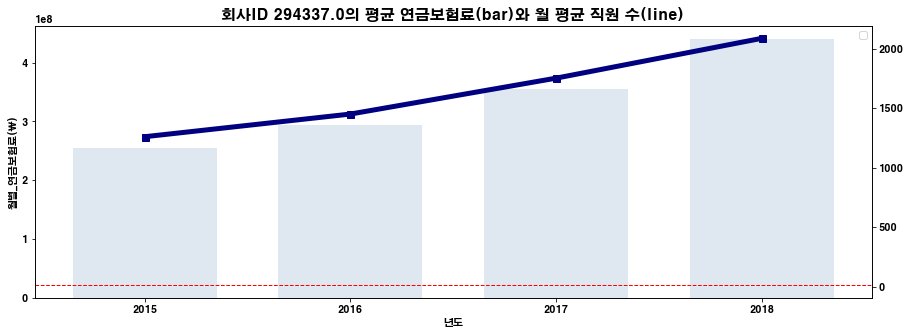

In [394]:
# 월별 연금보험료, 월별_직원수

fig, ax1 = plt.subplots()

ax1.bar(cor1['년도'],cor1['월별_연금보험료'], color='lightsteelblue', alpha=0.4, width=0.7)
# https://matplotlib.org/3.2.1/gallery/color/named_colors.html : 색상표
ax1.set_xlabel('년도')
ax1.set_ylabel('월별_연금보험료(￦)')

ax2 = ax1.twinx()
ax2.plot(cor1['년도'], cor1['월별_직원수'],'-s', color='navy', markersize=7, linewidth=5, alpha=1)

plt.axhline(y=10, color='r', linewidth=1, ls='--') # 인원 수 minimun 10명을 기준으로 line 그린 것        
plt.legend(loc='best')
plt.title("회사ID " + str(cor1['회사ID'][0]) + "의 평균 연금보험료(bar)와 월 평균 직원 수(line)", fontsize=15)
plt.show()

# 생각
- 위에서 작업한 건 시계열 데이터를 단순 시각화 한 것. 아래는 간단한 통계 자료들인데

- ↓ 회사 ID, 연매출액, 매출액증가율은 데이터가 1개로 고정이라서 변동 X : 변동이 있는건 월별 연금보험료와 월별 직원수 데이터
    - mean, median, quantile(.25, .75), min, max 값이 다 비슷비슷.. 전부 다 하는 게 옳을까?

In [379]:
d294337.groupby('년도').mean()

,회사ID,연매출액,월별_연금보험료,월별_직원수,매출액증가율
년도,,,,,
2015,294337.0,102579741.0,254958800.0,1260.000000,0.0000
2016,294337.0,146274359.0,293931090.0,1450.416667,42.5958
2017,294337.0,192586665.0,354420340.0,1752.000000,31.6613
2018,294337.0,287134819.0,440364375.0,2086.583333,49.0938


In [374]:
d294337.groupby('년도').median() # mean()이랑 조금 다름

,회사ID,연매출액,월,월별_연금보험료,월별_직원수,매출액증가율
년도,,,,,,
2015,294337,102579741,11,244699780,1202,0.0000
2016,294337,146274359,1,266212980,1305,42.5958
2017,294337,192586665,1,319474640,1616,31.6613
2018,294337,287134819,1,389908020,1920,49.0938


In [375]:
d294337.groupby('년도').min()

,회사ID,연매출액,월,월별_연금보험료,월별_직원수,매출액증가율
년도,,,,,,
2015,294337,102579741,11,244699780,1202,0.0000
2016,294337,146274359,1,266212980,1305,42.5958
2017,294337,192586665,1,319474640,1616,31.6613
2018,294337,287134819,1,389908020,1920,49.0938


In [376]:
d294337.groupby('년도').max()

,회사ID,연매출액,월,월별_연금보험료,월별_직원수,매출액증가율
년도,,,,,,
2015,294337,102579741,12,265217820,1318,0.0000
2016,294337,146274359,9,311895520,1572,42.5958
2017,294337,192586665,9,384556580,1887,31.6613
2018,294337,287134819,9,489855720,2258,49.0938


In [377]:
d294337.groupby('년도').quantile(.25)

,회사ID,연매출액,월별_연금보험료,월별_직원수,매출액증가율
년도,,,,,
2015,294337.0,102579741.0,249829290.0,1231.00,0.0000
2016,294337.0,146274359.0,279519400.0,1371.00,42.5958
2017,294337.0,192586665.0,342450575.0,1711.75,31.6613
2018,294337.0,287134819.0,404330710.0,1981.75,49.0938


In [378]:
d294337.groupby('년도').quantile(.75) # quantile(.25)와 차이점은 연금보험료와 직원수

,회사ID,연매출액,월별_연금보험료,월별_직원수,매출액증가율
년도,,,,,
2015,294337.0,102579741.0,260088310.0,1289.00,0.0000
2016,294337.0,146274359.0,309443180.0,1531.00,42.5958
2017,294337.0,192586665.0,366414015.0,1777.00,31.6613
2018,294337.0,287134819.0,482059050.0,2210.75,49.0938
